## MBA Trabajo Final Grupal - Parte2

In [1]:
#Importar librerías para el tratamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('Tabla_Intruso_Detectado.xlsx')  ## importar la data del excel

In [3]:
train.info() ## información de la data, información de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      10000 non-null  int64
 1   FLAG_INTRUSO_DETECTADO  10000 non-null  int64
 2   FLAG_IP_EXTRANJERA      10000 non-null  int64
 3   MINUTOS_CONEXION        10000 non-null  int64
 4   N_CONEXION_U3M          10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [4]:
train.head() ## observar las cabeceras de la data

,ID,FLAG_INTRUSO_DETECTADO,FLAG_IP_EXTRANJERA,MINUTOS_CONEXION,N_CONEXION_U3M
0,1,0,1,13,11
1,2,0,0,14,9
2,3,0,0,10,13
3,4,0,0,9,7
4,5,0,0,10,11


In [5]:
train.FLAG_IP_EXTRANJERA = np.where(train.FLAG_IP_EXTRANJERA == 0, "No", "Si") ## Simplemente te dice si la tarjeta es IP extrajero es SI

In [6]:
train.head() ## La primera línea de la data te dice que la transacción no es un intruso, su conexión es desde el extrajero, se conecto 13 minutos y en los U3M se conecto 11 veces

,ID,FLAG_INTRUSO_DETECTADO,FLAG_IP_EXTRANJERA,MINUTOS_CONEXION,N_CONEXION_U3M
0,1,0,Si,13,11
1,2,0,No,14,9
2,3,0,No,10,13
3,4,0,No,9,7
4,5,0,No,10,11


In [7]:
#Variables dummies, sirve para transformar variables categóricas a numéricas, porque los algoritmos solo procesan varaibles numéricas 
train_model = pd.get_dummies(train, columns=['FLAG_IP_EXTRANJERA'],drop_first=True) 

In [8]:
train_model

,ID,FLAG_INTRUSO_DETECTADO,MINUTOS_CONEXION,N_CONEXION_U3M,FLAG_IP_EXTRANJERA_Si
0,1,0,13,11,True
1,2,0,14,9,False
2,3,0,10,13,False
3,4,0,9,7,False
4,5,0,10,11,False
...,...,...,...,...,...
9995,9996,0,8,8,False
9996,9997,0,11,18,True
9997,9998,1,7,10,False
9998,9999,1,8,12,True


In [9]:
train_model.info() ## Información de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      10000 non-null  int64
 1   FLAG_INTRUSO_DETECTADO  10000 non-null  int64
 2   MINUTOS_CONEXION        10000 non-null  int64
 3   N_CONEXION_U3M          10000 non-null  int64
 4   FLAG_IP_EXTRANJERA_Si   10000 non-null  bool 
dtypes: bool(1), int64(4)
memory usage: 322.4 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y=train_model['FLAG_INTRUSO_DETECTADO'] ## identificas el objetivo y=Intruso detectado
X=train_model.drop(['FLAG_INTRUSO_DETECTADO','ID'],axis=1) ## variables explicativas, son 3 variables

In [12]:
X ## Vista de las varaibles explicativas

,MINUTOS_CONEXION,N_CONEXION_U3M,FLAG_IP_EXTRANJERA_Si
0,13,11,True
1,14,9,False
2,10,13,False
3,9,7,False
4,10,11,False
...,...,...,...
9995,8,8,False
9996,11,18,True
9997,7,10,False
9998,8,12,True


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10,random_state=101) ## seleccionas data para entrenar el modelo y validar el modelo

In [14]:
## llamas al algoritmo
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression(C=1.0,max_iter=1000)

In [16]:
logmodel.fit(X_train,y_train) ## ejecutas el algoritmo con la data de entrenamiento

LogisticRegression(max_iter=1000)

In [17]:
logmodel.coef_ ## coeficientes de las variables: minutos de conexión, # conexxiones los U3M y Procedencia de la IP

array([[-0.18030974, -0.05685217,  1.58840721]])

In [18]:
logmodel.intercept_

array([0.88143117])

In [19]:
predictions1 = logmodel.predict(X_test)

In [20]:
predictions1

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [21]:
predictions_test_prob = logmodel.predict_proba(X_test) ## probabilidades por cada individuo para generar extrategias

In [22]:
predictions_test_prob

array([[0.90621563, 0.09378437],
       [0.49899464, 0.50100536],
       [0.52537741, 0.47462259],
       ...,
       [0.43800336, 0.56199664],
       [0.54879292, 0.45120708],
       [0.92045819, 0.07954181]])

In [23]:
predictions_train1 = logmodel.predict(X_train)

In [24]:
predictions_train1_prob = logmodel.predict_proba(X_train)

              precision    recall  f1-score   support

           0     0.7884    0.9072    0.8437       690
           1     0.6893    0.4581    0.5504       310

    accuracy                         0.7680      1000
   macro avg     0.7389    0.6827    0.6970      1000
weighted avg     0.7577    0.7680    0.7527      1000



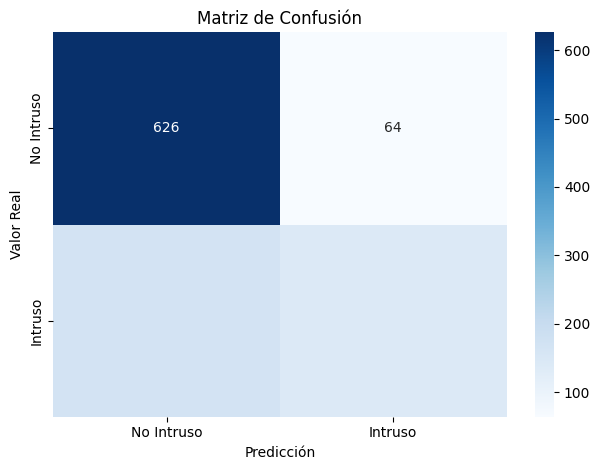

In [32]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
print(classification_report(y_test, predictions1, digits=4))

cm = confusion_matrix(y_test, predictions1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Intruso', 'Intruso'],
            yticklabels=['No Intruso', 'Intruso'])
plt.title(f"Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print(roc_auc_score(y_test,predictions1)) ## capacidad predictiva del modelo

0.6826554464703131


In [27]:
X_train['prob']=pd.DataFrame(predictions_train1_prob).iloc[:, 1].to_list()

In [28]:
X_train.head()

,MINUTOS_CONEXION,N_CONEXION_U3M,FLAG_IP_EXTRANJERA_Si,prob
6572,9,10,False,0.212507
2271,15,2,False,0.125987
6914,10,12,False,0.167438
6937,8,9,False,0.254887
1058,12,15,False,0.105735


In [29]:
X_train.sort_index(inplace = True)

In [30]:
X_train.to_excel('salidaIntruso.xlsx') ## exportar probabilidades al excel